In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
# importing csv file
df = pd.read_csv('nba_2017_nba_players_with_salary.csv')
df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [3]:
# checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 39 columns):
Unnamed: 0         342 non-null int64
Rk                 342 non-null int64
PLAYER             342 non-null object
POSITION           342 non-null object
AGE                342 non-null int64
MP                 342 non-null float64
FG                 342 non-null float64
FGA                342 non-null float64
FG%                342 non-null float64
3P                 342 non-null float64
3PA                342 non-null float64
3P%                320 non-null float64
2P                 342 non-null float64
2PA                342 non-null float64
2P%                342 non-null float64
eFG%               342 non-null float64
FT                 342 non-null float64
FTA                342 non-null float64
FT%                337 non-null float64
ORB                342 non-null float64
DRB                342 non-null float64
TRB                342 non-null float64
AST                342 

In [4]:
# creating own 3% to avoid the 20 nulls 
df['3p%'] = df['3P'] / df['3PA']

In [5]:
# creating a new data frame with the columns I am interested working with
nba = df[['PLAYER', 'POSITION','TEAM','SALARY_MILLIONS','FG%','3p%','eFG%','POINTS','AST','STL','TRB','AGE','TOV']]

In [6]:
nba.head()

,PLAYER,POSITION,TEAM,SALARY_MILLIONS,FG%,3p%,eFG%,POINTS,AST,STL,TRB,AGE,TOV
0,Russell Westbrook,PG,OKC,26.50,0.425,0.347222,0.476,31.6,10.4,1.6,10.7,28,5.4
1,James Harden,PG,HOU,26.50,0.440,0.344086,0.525,29.1,11.2,1.5,8.1,27,5.7
2,Isaiah Thomas,PG,BOS,6.59,0.463,0.376471,0.546,28.9,5.9,0.9,2.7,27,2.8
3,Anthony Davis,C,NO,22.12,0.505,0.277778,0.518,28.0,2.1,1.3,11.8,23,2.4
4,DeMarcus Cousins,C,NO/SAC,16.96,0.452,0.360000,0.498,27.0,4.6,1.4,11.0,26,3.7


In [7]:
# setting graph styles
sns.set_style('whitegrid')

In [8]:
# breaking the position column down into numerical values
features = pd.get_dummies(nba['POSITION'])

In [9]:
# creating a feature that groups point guards and shooting guards together
features['guard'] = np.where((nba['POSITION'].isin(['PG','SG'])), 1, 0)

In [10]:
# break down by position
print(pd.crosstab(features['guard'], nba['POSITION']))

POSITION   C  PF  PF-C  PG  SF  SG
guard                             
0         67  70     2   0  65   0
1          0   0     0  70   0  68


In [11]:
# creating another feature similar to the one above but for forwards
features['forward'] = np.where((nba['POSITION'].isin(['PF','SF'])), 1, 0)

In [12]:
# creating a feature for centers
features['bigman'] = np.where((nba['POSITION'].isin(['C','PF-C'])), 1, 0)

In [13]:
# Creating a feature that orginizes players by age 
features['old'] = np.where(nba['AGE']>=28, 1, 0)
print(nba['AGE'].groupby(features['old']).describe())

     count       mean       std   min   25%   50%    75%   max
old                                                           
0    206.0  23.597087  2.309639  19.0  22.0  24.0  25.75  27.0
1    136.0  30.757353  2.720284  28.0  29.0  30.0  32.00  40.0


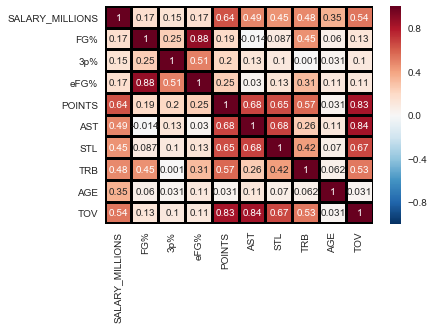

In [14]:
# A heat map showing the relationships between the numerical categories
sns.heatmap(nba.corr(), linecolor='black', linewidths=2, annot=True)

In [15]:
# turning the values into averages to help combined them into a new statistic
means = nba[['POINTS','STL','AST','TRB','SALARY_MILLIONS']].mean(axis=0)
stds = nba[['POINTS','STL','AST','TRB','SALARY_MILLIONS']].std(axis=0)
features['statmoney'] = ((nba[['POINTS','STL','AST','TRB','SALARY_MILLIONS']] - means) / stds).mean(axis=1)
nba['statmoney'] = features['statmoney']

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:
# creating a new data frame, add the original colomns and the newly made feature.
nbadf = nba.loc[:,['POINTS','STL','AST','TRB','SALARY_MILLIONS']]
nbadf['statmoney'] = features['statmoney']

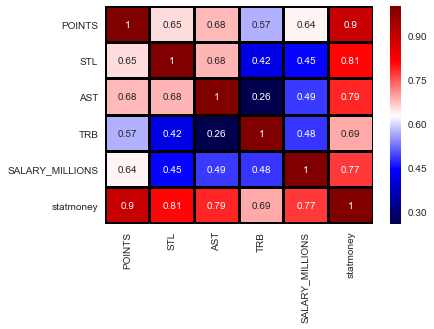

In [17]:
# mapping the new dataframe to see how our new statmoney column is made up
sns.heatmap(nbadf.corr(), cmap='seismic', linecolor='black', linewidths=2, annot=True)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


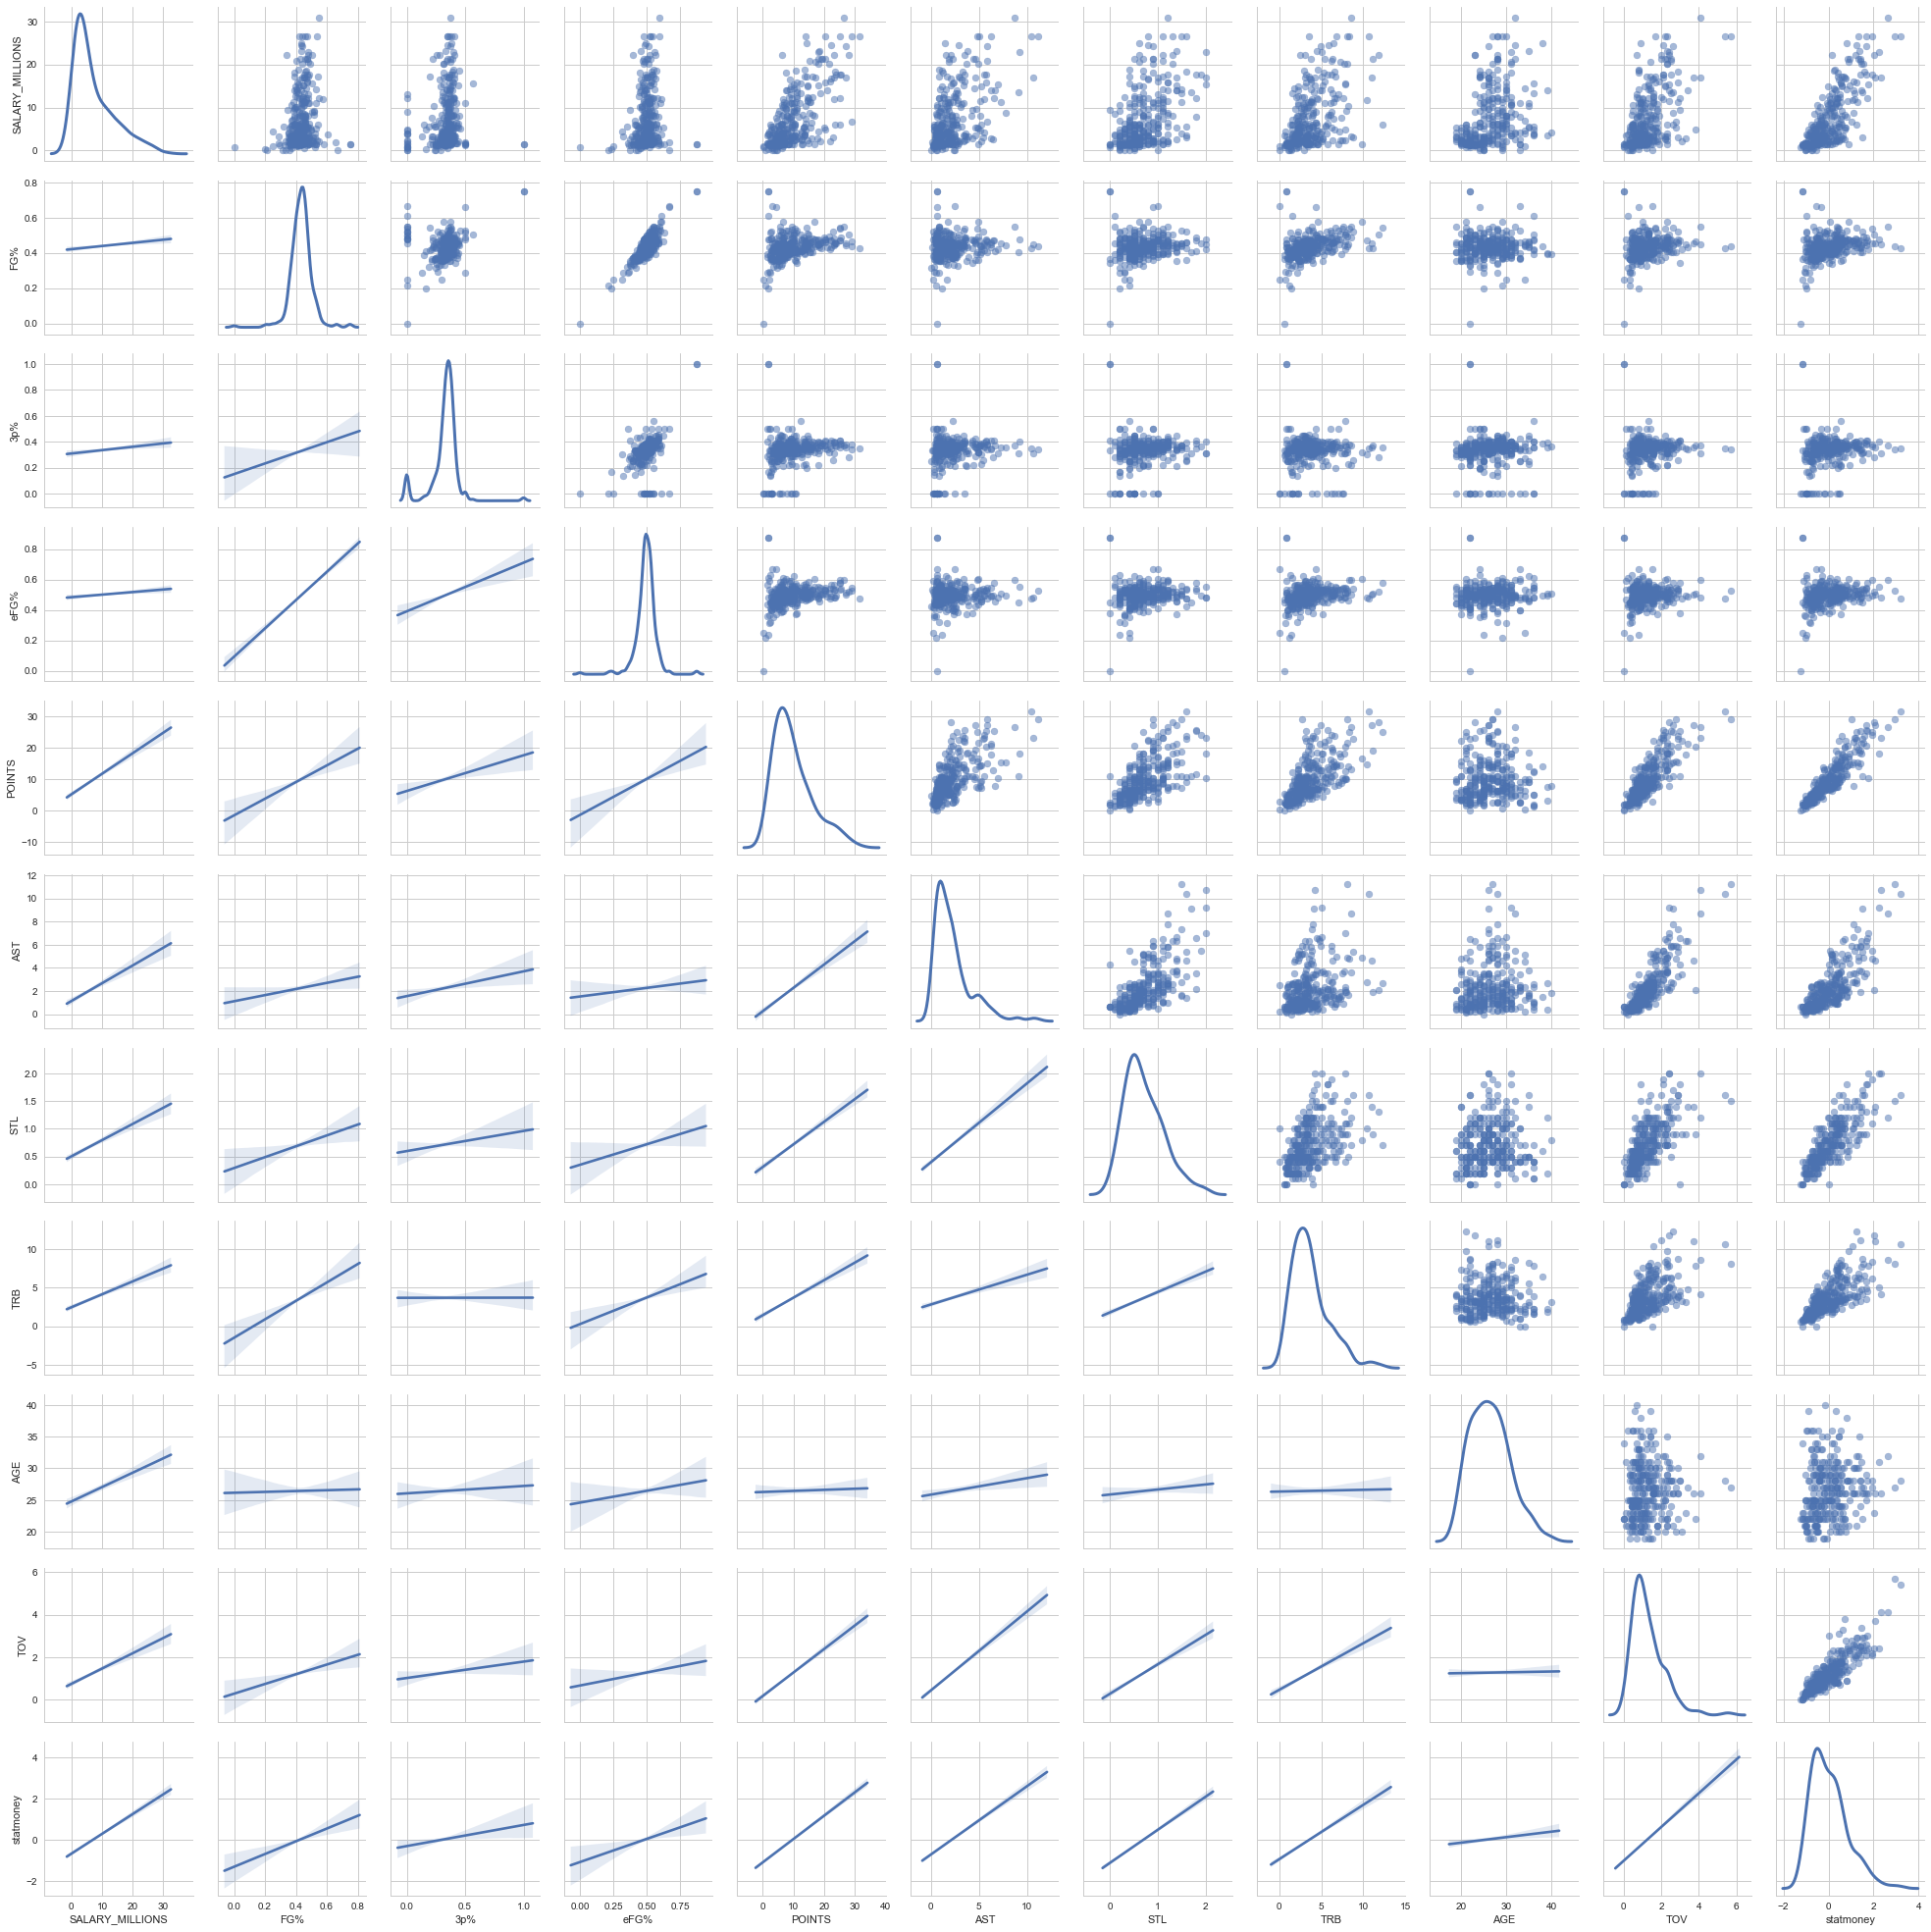

In [18]:
# creating a grid to see how columns interact with one another and their distribution
gd = sns.PairGrid(nba.dropna(), diag_sharey=False)
gd.map_upper(plt.scatter, alpha=.5)
gd.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
gd.map_diag(sns.kdeplot, lw=3)

<function matplotlib.pyplot.tight_layout>

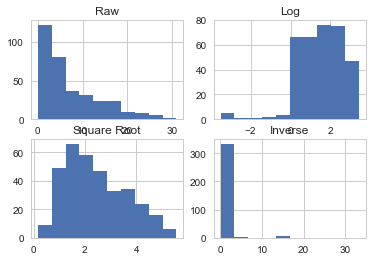

In [19]:
# changing the way the salary in millions column is distributed
fig = plt.figure()

fig.add_subplot(221)
plt.hist(nba['SALARY_MILLIONS'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(nba['SALARY_MILLIONS'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(nba['SALARY_MILLIONS'].dropna()))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist(1 / nba['SALARY_MILLIONS'].dropna())
plt.title('Inverse')
plt.tight_layout

In [20]:
#  keeping the squared dist as a new feature
features['sal_sqrt'] = (np.sqrt(nba['SALARY_MILLIONS']))

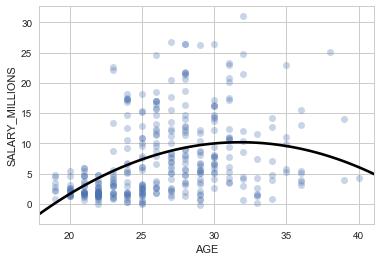

In [21]:
#  plotting age vs salary squared to get a more dramatic trend line 
sns.regplot(
    x=nba['AGE'],
    y=nba['SALARY_MILLIONS'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

In [22]:
# saving the feature
features['age_squared'] = nba['AGE'] * nba['AGE']

In [23]:
features.head()

,C,PF,PF-C,PG,SF,SG,guard,forward,bigman,old,statmoney,sal_sqrt,age_squared
0,0,0,0,1,0,0,1,0,0,1,3.193192,5.147815,784
1,0,0,0,1,0,0,1,0,0,0,2.933217,5.147815,729
2,0,0,0,1,0,0,1,0,0,0,1.014492,2.567100,729
3,1,0,0,0,0,0,0,0,1,0,2.011526,4.703190,529
4,1,0,0,0,0,0,0,0,1,0,2.067791,4.118252,676


In [24]:
# add turn overs to nba df for a negative example

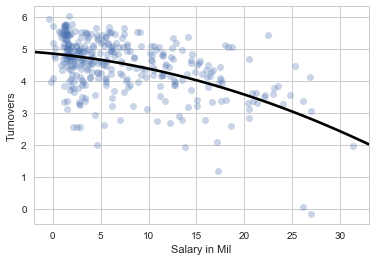

In [36]:
features['turnovers'] = max(nba['TOV']) - nba['TOV']

sns.regplot(
    nba['SALARY_MILLIONS'],
    features['turnovers'],
    x_jitter=.49,
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Salary in Mil')
plt.ylabel('Turnovers')

In [25]:
# alright, to my surprise turnovers actually increase as Salary is increased

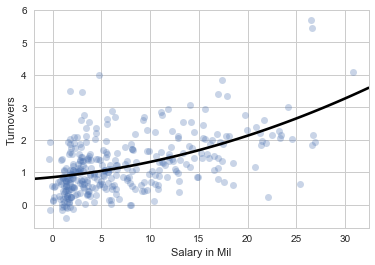

In [38]:
# reseting our new turnover variable of a better visualization

features['turnovers'] = nba['TOV']

sns.regplot(
    nba['SALARY_MILLIONS'],
    features['turnovers'],
    x_jitter=.49,
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Salary in Mil')
plt.ylabel('Turnovers')

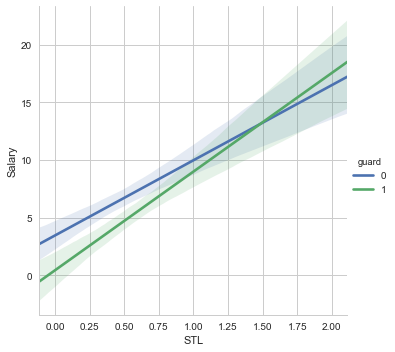

In [39]:
# added salary in millions and stls to feature df to orginize the data by our guard feature 
features['Salary'] = nba['SALARY_MILLIONS']
features['STL'] = nba['STL']

sns.lmplot(
    x='STL',
    y='Salary',
    hue='guard',
    data=features,
    scatter=False
)

In [40]:
# adding a feature, just guard steals
features['guardstl'] = features['STL'] * features['guard']

In [48]:
features['guardsal'] = features['Salary'] * features['guard']

In [29]:
features.head()

,C,PF,PF-C,PG,SF,SG,guard,forward,bigman,old,statmoney,sal_sqrt,age_squared,Salary,STL,guardstl
0,0,0,0,1,0,0,1,0,0,1,3.193192,5.147815,784,26.50,1.6,1.6
1,0,0,0,1,0,0,1,0,0,0,2.933217,5.147815,729,26.50,1.5,1.5
2,0,0,0,1,0,0,1,0,0,0,1.014492,2.567100,729,6.59,0.9,0.9
3,1,0,0,0,0,0,0,0,1,0,2.011526,4.703190,529,22.12,1.3,0.0
4,1,0,0,0,0,0,0,0,1,0,2.067791,4.118252,676,16.96,1.4,0.0


In [41]:
# standarizing units for 'POINTS','STL','AST','TRB
means = nba[['POINTS','STL','AST','TRB']].mean(axis=0)
stds = nba[['POINTS','STL','AST','TRB']].std(axis=0)
features['stats'] = ((nba[['POINTS','STL','AST','TRB']] - means) / stds).mean(axis=1)
nba['stats'] = features['stats']

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [42]:
# Running pca test on 'POINTS', 'AST', 'STL', 'TRB' to transform from 4 dimension to 2 dimensions

nba_pca = nba[['POINTS', 'AST', 'STL', 'TRB']].dropna()

X = StandardScaler().fit_transform(nba_pca)

sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.66476948  0.19558583]


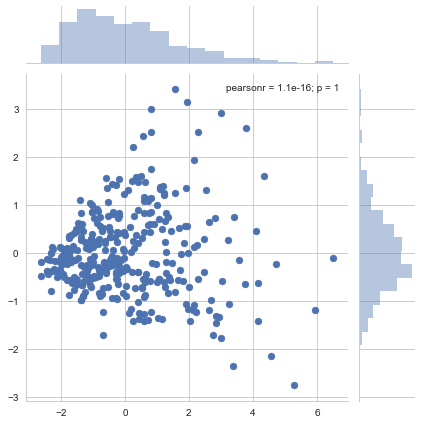

In [43]:
# using a scatter plot to visualize the new point distribution
sns.jointplot(Y_sklearn[:,0],Y_sklearn[:,1])

In [44]:
# importing feature selector to use on our new X value
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[ 3.54282537,  4.41228037,  2.24846102,  2.83410184],
       [ 3.14302128,  4.83572557,  2.00434239,  1.75279945],
       [ 3.11103695,  2.03040114,  0.53963064, -0.49298244],
       ..., 
       [-1.38276102, -0.82785393, -0.68096248, -1.11681075],
       [-1.44672968, -0.98664588, -0.68096248, -1.61587339],
       [-1.478714  , -0.77492328, -1.65743698, -1.36634207]])

In [49]:
features.columns

Index(['C', 'PF', 'PF-C', 'PG', 'SF', 'SG', 'guard', 'forward', 'bigman',
       'old', 'statmoney', 'sal_sqrt', 'age_squared', 'Salary', 'STL',
       'guardstl', 'stats', 'turnovers', 'guardsal'],
      dtype='object')

##  Analysis of 5 best new features

1) Age, squared shows how players entering the nba often struggle then then start to pick up in preformance until about 30 years old then they begin to decline again.

2) Stats, Is the 4 main in game stats from nba data frame, all converted to a standard unit, then weight against one another.

3) Forward, Allows use to compare player's that assume similar roles without noise from other roles/positions.

4) Forward, Allows use to compare player's that assume similar roles without noise from other roles/positions.

5) Guardsal, Allows use to isolate the relationship between other statistics and a guards salary

In [50]:
# Below is extra, I was trying out new things with pca 

In [45]:
# experimenting with pca function
features_pca = features.dropna()

X = StandardScaler().fit_transform(features_pca)

sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.28150323  0.19268932  0.14700309  0.10780628  0.070997    0.06874705]


In [116]:
nba.columns

Index(['PLAYER', 'POSITION', 'TEAM', 'SALARY_MILLIONS', 'FG%', '3p%', 'eFG%',
       'POINTS', 'AST', 'STL', 'TRB', 'AGE', 'TOV'],
      dtype='object')

In [119]:
# experimenting with pca function
sal_pca = nba[['SALARY_MILLIONS','eFG%',
       'POINTS']].dropna()

X = StandardScaler().fit_transform(sal_pca)

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.58386259  0.29654542  0.11959199]


In [128]:
# experimenting with pca function
guard_pca = features[['guard','guardstl']].dropna()

X = StandardScaler().fit_transform(guard_pca)

sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.52869942  0.47130058]
